In [1]:
from keras.layers import Input, merge, Concatenate, Dense, Dropout, Conv2D, Add, Dot, Lambda, Conv2DTranspose, Dot, Activation, Reshape, BatchNormalization, UpSampling2D, AveragePooling2D, GlobalAveragePooling2D, Multiply, LeakyReLU, Flatten, MaxPool2D 
from keras.layers.convolutional import Convolution2D, UpSampling2D
from keras.models import Model
import keras.backend as K
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# Author: Jose Sepulveda
# Description: This is a keras implementation of spectral normalization.
#              This was proposed in this paper: https://arxiv.org/pdf/1802.05957.pdf
#


from keras import backend as K


# Stochastic Gradient Descent with Spectral Normalization:
#   1) Initialize a random vector u, initialized from an isotropic distribution.
#   2) Use the Power iteration method with this vector u on the matrix of wieghts
#      to obtain two approximations of eigenvectors.
#   3) Calculate the spectral norm of the wieghts matrix.
#   4) Update wieghts using vanilla SGD using the spectral norm of the wieghts matrix.

def spectral_norm(w):
    """
        Input: tensor of wieghts
        Output: SN tensor of wieghts
    """
    def l2_norm(v):
        return K.sum(v ** 2) ** 0.5

    w_dim = w.shape.as_list()[-1]
    # Initialize random vector u
    u = K.random_normal(shape=[1, w_dim])

    # We need to flatten the wieghts
    w_flat = K.reshape(w, [-1, w_dim])

    # Power iteration method
    v = K.dot(u, K.transpose(w_flat))
    v = v / l2_norm(v)
    u = K.dot(v, w_flat)
    u = u / l2_norm(u)

    # Calculate the SN of W
    sigma = K.dot(K.dot(v, w_flat), K.transpose(u))
    w_sn = w_flat / sigma

    # Update wieghts
    w_sn = K.reshape(w_sn, w.shape.as_list())
    return w_sn


In [36]:
def ResBlockDown(input_shape, channel_size, channel_multiplier=1, name=None):
    # Resblock architecture
    # 1 BatchNorm 
    # 2 ReLU activation
    # 3 Conv layer
    # 4 BatchNorm
    # 5 ReLU activation
    # 6 Conv layer
    # 7 Sum with input 
    
    #FIRST BLOCK
    #input layer
    input_layer = Input(shape=input_shape)
    
    # BatchNorm - needs to be conditional
    resblock = BatchNormalization()(input_layer)
    
    # Relu
    resblock = Activation('relu')(resblock)
    
    # Convolution size 3 filter as per paper
    # Need to spectrally normalize here somehow
    resblock = Conv2D(channel_size * channel_multiplier, 3, padding='same', strides=2)(resblock)
    #SECOND BLOCK
    
    # BatchNorm - needs to be conditional
    resblock = BatchNormalization()(resblock)
    # Relu
    resblock = Activation('relu')(resblock)
    # Convolution size 3 filter as per paper
    # Need to spectrally normalize here somehow
    resblock = Conv2D(channel_size * channel_multiplier, 3, padding='same')(resblock)
    # Downsample
    #resblock = AveragePooling2D()(resblock)
    
    # Time for the shortcut connection!
    
    shortcut_identity = Conv2D(channel_size * channel_multiplier, 3, padding='same', strides=2)(input_layer)
    #shortcut_identity = AveragePooling2D()(shortcut_identity)
    
    output_layer = Add()([shortcut_identity, resblock])
    
    return Model(input_layer, output_layer, name=name)
    





IndentationError: unexpected indent (<ipython-input-36-266f162e0191>, line 156)

In [4]:
def ResBlockUp(input_shape, channel_size, channel_multiplier=1, name=None):
    # Resblock architecture
    # 1 BatchNorm 
    # 2 ReLU activation
    # 3 Conv layer
    # 4 BatchNorm
    # 5 ReLU activation
    # 6 Conv layer
    # 7 Sum with input 
    
    #FIRST BLOCK
    #input layer
    input_layer = Input(shape=input_shape)
    
    # BatchNorm - needs to be conditional
    resblock = BatchNormalization()(input_layer)
    
    # Relu
    resblock = Activation('relu')(resblock)
    
    # Convolution size 3 filter as per paper
    # Need to spectrally normalize here somehow
    resblock = Conv2DTranspose(channel_size * channel_multiplier, 3, padding='same', strides=2)(resblock)
    
    #SECOND BLOCK
    
    # BatchNorm - needs to be conditional
    resblock = BatchNormalization()(resblock)
    
    # Relu
    resblock = Activation('relu')(resblock)
    
    # Convolution size 3 filter as per paper
    # Need to spectrally normalize here somehow
    resblock = Conv2DTranspose(channel_size * channel_multiplier, 3, padding='same')(resblock)
    
    # Downsample
    #resblock = AveragePooling2D()(resblock)
    
    # Time for the shortcut connection!
    
    shortcut_identity = Conv2DTranspose(channel_size * channel_multiplier, 1, padding='same', strides=2)(input_layer)
    #shortcut_identity = AveragePooling2D()(shortcut_identity)
    output_layer = Add()([shortcut_identity, resblock])
    
    return Model(input_layer, output_layer, name=name)
    
    

In [5]:
def ResBlock(input_shape, channel_size, channel_multiplier=1, name=None):
     # Resblock architecture
    # 1 BatchNorm 
    # 2 ReLU activation
    # 3 Conv layer
    # 4 BatchNorm
    # 5 ReLU activation
    # 6 Conv layer
    # 7 Sum with input 
    
    #FIRST BLOCK
    #input layer
    input_layer = Input(shape=input_shape)
    
    # BatchNorm - needs to be conditional
    resblock = BatchNormalization()(input_layer) 
    # Relu
    resblock = Activation('relu')(resblock)
    # Convolution size 3 filter as per paper
    # Need to spectrally normalize here somehow
    resblock = Conv2D(channel_size * channel_multiplier, 3, padding='same')(resblock)
    
    #SECOND BLOCK   
    # BatchNorm - needs to be conditional
    resblock = BatchNormalization()(input_layer)    
    # Relu
    resblock = Activation('relu')(resblock)    
    # Convolution size 3 filter as per paper
    # Need to spectrally normalize here somehow
    resblock = Conv2D(channel_size * channel_multiplier, 3, padding='same')(resblock)
     
    # Time for the shortcut connection!   
    shortcut_identity = Conv2D(channel_size * channel_multiplier, 1, padding='same')(input_layer)
    output_layer = Add()([shortcut_identity, resblock])
    
    return Model(input_layer, output_layer, name=name)
    
    
    
    
    
    

In [26]:


def SelfAttentionBlock(input_shape, name=None):
    # f = conv
    channels = input_shape[-1]
    input_layer = Input(shape=input_shape)
    f = Conv2D(channels // 8, 1, padding='same')(input_layer)
    # f = maxpooling
    f = MaxPool2D(pool_size=2, strides=2, padding='same')(f)
    
    g = Conv2D(channels // 8, 1, padding='same')(input_layer)
    
    h = Conv2D(channels // 2, 1, padding='same')(input_layer)
    h = MaxPool2D(pool_size=2, strides=2, padding='same')(h)
    
    
    g = Reshape((-1, g.shape[-1]))(g)
    f = Reshape((-1, g.shape[-1]))(f)
    s = Dot(-1)([g, f])
    print("Shape of s:{}".format(s.shape))
    beta = Activation('softmax')(s)
    print("Shape of beta:{}".format(beta.shape))
    h = Reshape((-1, h.shape[-1]))(h)
    print("Shape of h:{}".format(h.shape))
    o = tf.matmul(beta, h)
    
    gamma = Conv2D(channels, (1, 1), padding='same', use_bias=False, kernel_initializer='he_normal')(input_layer)
    #gamma = Reshape((-1, channels // 2))(g)
    #print(gamma.shape)
    a, x, y ,z = input_layer.shape
    print(o.shape)
    #o = K.reshape(o, shape=[x,y,z, channels // 2])
    o = Reshape((-1,z,channels//2))(o)
    o = Conv2D(channels, kernel_size=1, strides=1)(o)
  
    Wz_yi = gamma * o
    output_layer = Add()([Wz_yi, input_layer])
    #output_layer = gamma*o + input_layer
    
    return Model(input_layer, output_layer, name=name)

In [27]:

def GlobalSumPooling2D(name=None):
    return Lambda(lambda inputs: K.sum(inputs, axis=[1, 2]), name=name)
        
# Discriminator test
def build_discriminator(channel_multiplier=64):
    input_shape = (128,128,3)
    model_input = Input(shape=input_shape, name="D_input")
    resblockdown1 = ResBlockDown(input_shape=input_shape,channel_size=1, channel_multiplier=channel_multiplier, name='D_resblock_down_1')
    h = resblockdown1(model_input)
    selfattentionblock = SelfAttentionBlock(input_shape=(64,64,32), name='D_self_attention_block')
    h = selfattentionblock(h)
    # Non local block should be here
    #print(h.shape)
    ch = channel_multiplier
    x = input_shape[0]
    y = input_shape[1]
    resblockdown2 = ResBlockDown(input_shape=(x,y,channel_multiplier),channel_size=2, channel_multiplier=channel_multiplier, name='D_resblock_down_2')
    h = resblockdown2(h)
    #print(h.shape)
    x = x // 2
    y = y // 2
    ch = ch * 2
    resblockdown4 = ResBlockDown(input_shape=(x,y,ch),channel_size=4, channel_multiplier=channel_multiplier, name='D_resblock_down_4')
    h = resblockdown4(h)
    x = x // 2
    y = y // 2
    ch = ch * 2
    #print(h.shape)
    resblockdown8 = ResBlockDown(input_shape=(x,y,ch),channel_size=8, channel_multiplier=channel_multiplier, name='D_resblock_down_8')
    
    h = resblockdown8(h)
    x = x // 2
    y = y // 2
    ch = ch * 2
    

    resblockdown16 = ResBlockDown(input_shape=(x,y,ch),channel_size=16, channel_multiplier=channel_multiplier, name='D_resblock_down_16')
    h = resblockdown16(h)
    x = x // 2
    y = y // 2
    ch = ch * 2
    resblock16 = ResBlock(input_shape=(x,y,ch),channel_size=16, channel_multiplier=channel_multiplier, name='D_resblock_16')
    h = resblock16(h)

    h = Activation('relu', name="D_relu")(h)
    h = GlobalSumPooling2D(name="D_global_sum_pooling_2D")(h)
    model_output = Dense(1, name="D_dense")(h)
    model = Model(model_input, model_output, name="Discriminator")
    return model

build_discriminator().summary

Shape of s:(?, ?, ?)
Shape of beta:(?, ?, ?)
Shape of h:(?, ?, 16)
(?, ?, 16)


ValueError: Dimensions must be equal, but are 64 and 32 for 'mul_1' (op: 'Mul') with input shapes: [?,64,64,32], [?,?,32,32].

In [30]:
# only noise, non conditional
def build_generator(channel_multiplier=64):

    model_input = Input(shape=(128,), name="G_input")
    h = Dense(4*4*16*channel_multiplier, name="G_dense")(model_input)
    h = Reshape((4,4,16*channel_multiplier))(h) # 512 = 16*ch
    resblockup16 = ResBlockUp(input_shape=(4,4,1024), channel_size=16, channel_multiplier=channel_multiplier, name="G_resblock_up_16")
    h = resblockup16(h)
    resblockup8 = ResBlockUp(input_shape=(8,8,1024), channel_size=8, channel_multiplier=channel_multiplier, name="G_resblock_up_8")
    h = resblockup8(h)
    resblockup4 = ResBlockUp(input_shape=(16,16,512), channel_size=4, channel_multiplier=channel_multiplier, name="G_resblock_up_4")
    h = resblockup4(h)

    resblockup2 = ResBlockUp(input_shape=(64,64,256), channel_size=2, channel_multiplier=channel_multiplier, name="G_resblock_up_2")
    h = resblockup2(h)
#     need to debug the following
    #selfattentionblock = SelfAttentionBlock(input_shape=(64,64,32), name='G_self_attention_block')
    #h = selfattentionblock(h)
    resblockup1 = ResBlockUp(input_shape=(128,128,128), channel_size=1, channel_multiplier=channel_multiplier, name="G_resblock_up_1")
    h = resblockup1(h)
    #print(h.shape)
    h = BatchNormalization()(h)
    h = Activation('relu')(h)
    model_output = Conv2D(3, kernel_size=3, strides=1, padding='same', activation='tanh')(h)
    
    return Model(model_input, model_output, name="Generator")
build_generator().summary()

(?, ?, ?, 64)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
G_input (InputLayer)         (None, 128)               0         
_________________________________________________________________
G_dense (Dense)              (None, 16384)             2113536   
_________________________________________________________________
reshape_27 (Reshape)         (None, 4, 4, 1024)        0         
_________________________________________________________________
G_resblock_up_16 (Model)     (None, 8, 8, 1024)        19934208  
_________________________________________________________________
G_resblock_up_8 (Model)      (None, 16, 16, 512)       7609856   
_________________________________________________________________
G_resblock_up_4 (Model)      (None, 32, 32, 256)       1904384   
_________________________________________________________________
G_resblock_up_2 (Model)      multiple                  477056 

In [5]:
def UNETGenerator(input_img_dim, num_output_channels):
    """
    Creates the generator according to the specs in the paper below.
    It's basically a skip layer AutoEncoder
    Generator does the following:
    1. Takes in an image
    2. Generates an image from this image
    Differs from a standard GAN because the image isn't random.
    This model tries to learn a mapping from a suboptimal image to an optimal image.
    [https://arxiv.org/pdf/1611.07004v1.pdf][5. Appendix]
    :param input_img_dim: (channel, height, width)
    :param output_img_dim: (channel, height, width)
    :return:
    """
    # -------------------------------
    # ENCODER
    # C64-C128-C256-C512-C512-C512-C512-C512
    # 1 layer block = Conv - BN - LeakyRelu
    # -------------------------------
    stride = 2
    merge_mode = 'concat'

    # batch norm mode
    bn_mode = 2

    # batch norm merge axis
    bn_axis = 1

    input_layer = Input(shape=input_img_dim, name="unet_input")

    # 1 encoder C64
    # skip batchnorm on this layer on purpose (from paper)
    en_1 = Conv2D(64, 4, strides=2, padding="same")(input_layer)
    en_1 = LeakyReLU(alpha=0.2)(en_1)
    print(en_1.shape)

    # 2 encoder C128
    en_2 = Conv2D(128, 4, strides=2,padding='same')(en_1)
    en_2 = BatchNormalization()(en_2)
    en_2 = LeakyReLU(alpha=0.2)(en_2)
    print(en_2.shape)

    # 3 encoder C256
    en_3 = Conv2D(256, 4, padding='same', strides=2)(en_2)
    en_3 = BatchNormalization()(en_3)
    en_3 = LeakyReLU(alpha=0.2)(en_3)
    print(en_3.shape)

    # 4 encoder C512
    en_4 = Conv2D(512, 4, padding='same', strides=2)(en_3)
    en_4 = BatchNormalization()(en_4)
    en_4 = LeakyReLU(alpha=0.2)(en_4)
    print(en_4.shape)

    # 5 encoder C512
    en_5 = Conv2D(512, 4, padding='same', strides=2)(en_4)
    en_5 = BatchNormalization()(en_5)
    en_5 = LeakyReLU(alpha=0.2)(en_5)
    print(en_5.shape)

    # 6 encoder C512
    en_6 = Conv2D(512, 4, padding='same', strides=2)(en_5)
    en_6 = BatchNormalization()(en_6)
    en_6 = LeakyReLU(alpha=0.2)(en_6)
    print(en_6.shape)

    # 7 encoder C512
    en_7 = Conv2D(512, 4, padding='same', strides=2)(en_6)
    en_7 = BatchNormalization()(en_7)
    en_7 = LeakyReLU(alpha=0.2)(en_7)
    print(en_7.shape)



    # -------------------------------
    # DECODER
    # CD512-CD1024-CD1024-C1024-C1024-C512-C256-C128
    # 1 layer block = Conv - Upsample - BN - DO - Relu
    # also adds skip connections (merge). Takes input from previous layer matching encoder layer
    # -------------------------------


    # 2 decoder CD1024 (decodes en_7)
    de_2 = UpSampling2D(size=(2, 2))(en_7)
    de_2 = Conv2D(1024, 4, padding='same')(de_2)
    de_2 = BatchNormalization()(de_2)
    de_2 = Dropout(rate=0.5)(de_2)
    de_2 = Concatenate()([de_2, en_6])
    de_2 = Activation('relu')(de_2)

    # 3 decoder CD1024 (decodes en_6)
    de_3 = UpSampling2D(size=(2, 2))(de_2)
    de_3 = Conv2D(1024, 4, padding='same')(de_3)
    de_3 = BatchNormalization()(de_3)
    de_3 = Dropout(rate=0.5)(de_3)
    de_3 = Concatenate()([de_3, en_5])
    de_3 = Activation('relu')(de_3)

    # 4 decoder CD1024 (decodes en_5)
    de_4 = UpSampling2D(size=(2, 2))(de_3)
    de_4 = Conv2D(1024, 4, padding='same')(de_4)
    de_4 = BatchNormalization()(de_4)
    de_4 = Dropout(rate=0.5)(de_4)
    de_4 = Concatenate()([de_4, en_4])
    de_4 = Activation('relu')(de_4)

    # 5 decoder CD1024 (decodes en_4)
    de_5 = UpSampling2D(size=(2, 2))(de_4)
    de_5 = Conv2D(1024, 4, padding='same')(de_5)
    de_5 = BatchNormalization()(de_5)
    de_5 = Dropout(rate=0.5)(de_5)
    de_5 = Concatenate()([de_5, en_3])
    de_5 = Activation('relu')(de_5)

    # 6 decoder C512 (decodes en_3)
    de_6 = UpSampling2D(size=(2, 2))(de_5)
    de_6 = Conv2D(512, 4, padding='same')(de_6)
    de_6 = BatchNormalization()(de_6)
    de_6 = Dropout(rate=0.5)(de_6)
    de_6 = Concatenate()([de_6, en_2])
    de_6 = Activation('relu')(de_6)

    # 7 decoder CD256 (decodes en_2)
    de_7 = UpSampling2D(size=(2, 2))(de_6)
    de_7 = Conv2D(256, 4, padding='same')(de_7)
    de_7 = BatchNormalization()(de_7)
    de_7 = Dropout(rate=0.5)(de_7)
    de_7 = Concatenate()([de_7, en_1])
    de_7 = Activation('relu')(de_7)

    # After the last layer in the decoder, a conv is applied
    # to map to the number of output channels (3 in general,
    # except in colorization, where it is 2), followed by a Tanh
    # function.
    de_8 = UpSampling2D(size=(2, 2))(de_7)
    de_8 = Conv2D(num_output_channels, 4, padding='same')(de_8)
    de_8 = Activation('tanh')(de_8)

    unet_generator = Model(input_layer, de_8, name='unet_generator')
    return unet_generator
UNETGenerator((128,128,1),3).summary()

(?, 64, 64, 64)
(?, 32, 32, 128)
(?, 16, 16, 256)
(?, 8, 8, 512)
(?, 4, 4, 512)
(?, 2, 2, 512)
(?, 1, 1, 512)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
unet_input (InputLayer)         (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 64, 64, 64)   1088        unet_input[0][0]                 
__________________________________________________________________________________________________
leaky_re_lu_8 (LeakyReLU)       (None, 64, 64, 64)   0           conv2d_15[0][0]                  
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 32, 32, 128)  131200      leaky_re_lu_8[0][0]              

In [6]:
import glob
import cv2
import numpy as np
def dataLoader(datapath):
    edge_filepaths = sorted(glob.glob(datapath+'edge-*.png'))
    img_filepaths = sorted(glob.glob(datapath+'*.png'))
    edges = []
    imgs = []
    for edge_fp, img_fp in zip(edge_filepaths,img_filepaths):
        edge = cv2.imread(edge_fp, 0)
        img = cv2.imread(img_fp)
        edge[edge != 255] = 0
        edge = edge // 255
        edges.append(edge)
        imgs.append(img)
        
    return np.array(edges), np.array(imgs)
    

In [7]:
edges, imgs = dataLoader('./edge-data/')
print(edges.shape)



(8144, 128, 128)


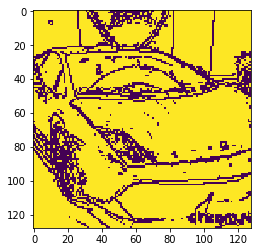

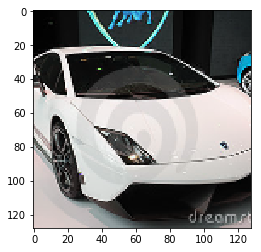

(8144, 128, 128, 3)


In [14]:
import matplotlib.pyplot as plt
plt.imshow(edges[4565])
plt.show()
plt.imshow(imgs[4565])
plt.show()
print(imgs.shape)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from keras.models import Model, Sequential
from keras import optimizers 
import keras.backend as K
from keras.utils.generic_utils import Progbar
from keras.optimizers import Adam

In [3]:
import tensorflow as tf
###################################
# TensorFlow wizardry
config = tf.ConfigProto()
 
# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True
 
# Only allow a total of half the GPU memory to be allocated
config.gpu_options.per_process_gpu_memory_fraction = 0.5
 
# Create a session with the above options specified.
K.tensorflow_backend.set_session(tf.Session(config=config))
###################################
 

In [14]:
#Hyperperemeter
BATCHSIZE=16
LEARNING_RATE = 0.0002
TRAINING_RATIO = 1
BETA_1 = 0.0
BETA_2 = 0.9
EPOCHS = 500
BN_MIMENTUM = 0.9
BN_EPSILON  = 0.00002
SAVE_DIR = 'gen-imgs/'

GENERATE_ROW_NUM = 4
GENERATE_BATCHSIZE = GENERATE_ROW_NUM*GENERATE_ROW_NUM

In [15]:

generator = build_generator()
discriminator = build_discriminator()

Noise_input_for_training_generator = Input(shape=(128,))
Generated_image                    = generator(Noise_input_for_training_generator)
Discriminator_output               = discriminator(Generated_image)
model_for_training_generator       = Model(Noise_input_for_training_generator, Discriminator_output)
print("model_for_training_generator")
discriminator.trainable = False
model_for_training_generator.summary()
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_for_training_generator.compile(optimizer=Adam(LEARNING_RATE, beta_1=BETA_1, beta_2=BETA_2), loss='mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.
model_for_training_generator
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 128)               0         
_________________________________________________________________
Generator (Model)            (None, 128, 128, 3)       32160771  
_________________________________________________________________
Discriminator (Model)        (None, 1)                 35618509  
Total params: 67,779,280
Trainable params: 32,150,787
Non-trainable params: 35,628,493
_________________________________________________________________


In [16]:
Real_image                             = Input(shape=(128,128,3))
Noise_input_for_training_discriminator = Input(shape=(128,))
Fake_image                             = generator(Noise_input_for_training_discriminator)
Discriminator_output_for_real          = discriminator(Real_image)
Discriminator_output_for_fake          = discriminator(Fake_image)

model_for_training_discriminator       = Model([Real_image,
                                                Noise_input_for_training_discriminator],
                                               [Discriminator_output_for_real,
                                                Discriminator_output_for_fake])
print("model_for_training_discriminator")
generator.trainable = False
discriminator.trainable = True
model_for_training_discriminator.compile(optimizer=Adam(LEARNING_RATE/1.5, beta_1=BETA_1, beta_2=BETA_2), loss=['mean_squared_error','mean_squared_error'])
model_for_training_discriminator.summary()

model_for_training_discriminator
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 128)          0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
Generator (Model)               (None, 128, 128, 3)  32160771    input_14[0][0]                   
__________________________________________________________________________________________________
Discriminator (Model)           (None, 1)            35618509    input_13[0][0]                   
                                                                 Generator[2

In [17]:
real_y = np.ones((BATCHSIZE, 1), dtype=np.float32)
fake_y = -real_y

In [18]:
X = imgs/255*2-1

In [19]:

test_noise = np.random.randn(GENERATE_BATCHSIZE, 128)
W_loss = []
discriminator_loss = []
generator_loss = []
for epoch in range(EPOCHS):
    np.random.shuffle(X)
    
    print("epoch {} of {}".format(epoch+1, EPOCHS))
    num_batches = int(X.shape[0] // BATCHSIZE)
    
    print("number of batches: {}".format(int(X.shape[0] // (BATCHSIZE))))
    
    progress_bar = Progbar(target=int(X.shape[0] // (BATCHSIZE * TRAINING_RATIO)))
    minibatches_size = BATCHSIZE * TRAINING_RATIO
    
    start_time = time()
    for index in range(int(X.shape[0] // (BATCHSIZE * TRAINING_RATIO))):
        progress_bar.update(index)
        discriminator_minibatches = X[index * minibatches_size:(index + 1) * minibatches_size]
        
        for j in range(TRAINING_RATIO):
            image_batch = discriminator_minibatches[j * BATCHSIZE : (j + 1) * BATCHSIZE]
            noise = np.random.randn(BATCHSIZE, 128).astype(np.float32)
            discriminator.trainable = True
            generator.trainable = False
            discriminator_loss.append(model_for_training_discriminator.train_on_batch([image_batch, noise],
                                                                                      [real_y, fake_y]))
        discriminator.trainable = False
        generator.trainable = True
        generator_loss.append(model_for_training_generator.train_on_batch(np.random.randn(BATCHSIZE, 128), real_y))
    
    print('\nepoch time: {}'.format(time()-start_time))
    
    W_real = model_for_training_generator.evaluate(test_noise, real_y)
    #print(W_real)
    W_fake = model_for_training_generator.evaluate(test_noise, fake_y)
    #print(W_fake)
    W_l = W_real+W_fake
    #print('wasserstein_loss: {}'.format(W_l))
    W_loss.append(W_l)
    #Generate image
    generated_image = generator.predict(test_noise)
    generated_image = (generated_image+1)/2
    for i in range(GENERATE_ROW_NUM):
        new = generated_image[i*GENERATE_ROW_NUM:i*GENERATE_ROW_NUM+GENERATE_ROW_NUM].reshape(128*GENERATE_ROW_NUM,128,3)
        if i!=0:
            old = np.concatenate((old,new),axis=1)
        else:
            old = new
    print('plot generated_image')
    plt.imsave('{}/epoch_{}.png'.format(SAVE_DIR, epoch), old)

epoch 1 of 500
number of batches: 509
  0/509 [..............................] - ETA: 0sWARNING:tensorflow:From C:\Users\Jose\Anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
508/509 [============================>.] - ETA: 0s
epoch time: 246.57747316360474
16/16 [==============================] - 0s 5ms/step
plot generated_image
epoch 2 of 500
number of batches: 509
508/509 [============================>.] - ETA: 0s
epoch time: 233.60049271583557
16/16 [==============================] - 0s 5ms/step
plot generated_image
epoch 3 of 500
number of batches: 509
508/509 [============================>.] - ETA: 0s
epoch time: 232.94044256210327
16/16 [==============================] - 0s 5ms/step
plot generated_image
epoch 4 of 500
number of batches: 509
508/509 [============================>.] - ETA: 0s
epoch time: 232.5017814

KeyboardInterrupt: 

In [152]:
gen_img = generator.predict(test_noise)

In [153]:
gen_img = (gen_img +1)/2

In [154]:
gen_img

array([[[[0.8568259 , 0.77873147, 0.7490115 ],
         [0.85222054, 0.7882384 , 0.8131676 ],
         [0.846822  , 0.7554947 , 0.54355377],
         ...,
         [0.92997754, 0.88324034, 0.92553425],
         [0.9221339 , 0.8859236 , 0.8709059 ],
         [0.8447546 , 0.8508223 , 0.86675775]],

        [[0.77683294, 0.71496195, 0.79499555],
         [0.6143031 , 0.76517934, 0.73243475],
         [0.9018154 , 0.8817203 , 0.8182306 ],
         ...,
         [0.9754667 , 0.97314394, 0.98516893],
         [0.9705703 , 0.9692347 , 0.968985  ],
         [0.92441714, 0.8927977 , 0.8763908 ]],

        [[0.667995  , 0.793537  , 0.8577317 ],
         [0.84004986, 0.86460924, 0.8482611 ],
         [0.66421014, 0.6898828 , 0.79323053],
         ...,
         [0.97276604, 0.9887979 , 0.99215627],
         [0.9405527 , 0.9679005 , 0.97065294],
         [0.94424367, 0.9637456 , 0.9563525 ]],

        ...,

        [[0.39122728, 0.3916723 , 0.3942794 ],
         [0.27499598, 0.3531556 , 0.32414132]

In [9]:
plt.imshow(gen_img[7])

NameError: name 'plt' is not defined

In [12]:
import glob
image_fns = sorted(glob.glob("./gen-imgs/*.png"))

In [33]:
import os

for image_name in image_fns:
    split_name = image_name.split('/')
    filename = split_name[-1]
    path = "/".join(split_name[0:2])
    
    split_filename = filename.split('_')[-1]
    corrected_filename = split_filename.rjust(7, '0')
    full_path = "/".join([path, corrected_filename])
    print(full_path)
    os.rename(image_name, full_path)



./gen-imgs/000.png
./gen-imgs/001.png
./gen-imgs/010.png
./gen-imgs/100.png
./gen-imgs/101.png
./gen-imgs/102.png
./gen-imgs/103.png
./gen-imgs/104.png
./gen-imgs/105.png
./gen-imgs/106.png
./gen-imgs/107.png
./gen-imgs/108.png
./gen-imgs/109.png
./gen-imgs/011.png
./gen-imgs/110.png
./gen-imgs/111.png
./gen-imgs/112.png
./gen-imgs/113.png
./gen-imgs/114.png
./gen-imgs/115.png
./gen-imgs/116.png
./gen-imgs/117.png
./gen-imgs/118.png
./gen-imgs/119.png
./gen-imgs/012.png
./gen-imgs/120.png
./gen-imgs/121.png
./gen-imgs/122.png
./gen-imgs/123.png
./gen-imgs/124.png
./gen-imgs/125.png
./gen-imgs/126.png
./gen-imgs/127.png
./gen-imgs/128.png
./gen-imgs/129.png
./gen-imgs/013.png
./gen-imgs/130.png
./gen-imgs/131.png
./gen-imgs/132.png
./gen-imgs/133.png
./gen-imgs/134.png
./gen-imgs/135.png
./gen-imgs/136.png
./gen-imgs/137.png
./gen-imgs/138.png
./gen-imgs/139.png
./gen-imgs/014.png
./gen-imgs/140.png
./gen-imgs/141.png
./gen-imgs/142.png
./gen-imgs/143.png
./gen-imgs/144.png
./gen-imgs/1

In [37]:
filenames = sorted(glob.glob("./gen-imgs/*.png"))

In [38]:
import imageio

In [41]:
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('./gen-imgs/first_attempt.gif', images)